# Evaluación Inicial de Madurez de Capacidades en Ciencia de Datos 
*David Escudero Cascón - 17/02/205*

## Bloque 1

### 1. Muestra el directorio sobre el que se está trabajando. Cambia el directorio de trabajo a la carpeta que te han indicado al comienzo de la prueba. 
- Código en GithUb https://github.com/daekka/ntt_evaluacion_tecnica.git

### 2. Carga de paquetes. Verifica si están instalados los siguientes paquetes: Pandas, Seaborn, y Xlrd. Si no están, instálalos.  

In [34]:
# pip install pandas seaborn xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import random
import os

### 3. Carga las funciones contenidas en el script wilcox1.py 

In [26]:
from Wilcox1 import multiplicar_2, al_cuadrado

### 4. Establece una semilla para que los resultados sean replicables.  

In [27]:
semilla = 183530 
np.random.seed(semilla)

### 5. Crea un nuevo entorno virtual llamado “venv”. No hace falta que instales nada en este entorno nuevo.  
```python
python -m venv venv
.\venv\Scripts\activate
deactivate

## Bloque 2

### 6. Realiza la carga del fichero data_train.csv. Las 373 deben cargarse como string y ser almacenadas en un dataframe denominado raw_datos. 

In [28]:
raw_datos = pd.read_csv('data_train.csv', dtype={'373': str}) # Carla la columna 373 como un string
print(raw_datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38067 entries, 0 to 38066
Columns: 373 entries, Unnamed: 0 to Target
dtypes: float64(106), int64(267)
memory usage: 108.3 MB
None


### 7. ¿Cómo sería la sentencia si los datos proviniesen de un fichero en formato .xlsx?  
```raw_datos = pd.read_excel('data_train.xlsx', dtype={'373': str})```

### 8. Realiza un análisis descriptivo de todas las variables.  

In [29]:
print (raw_datos.describe())

         Unnamed: 0             ID          var_1         var_2  \
count  38067.000000   38067.000000   38067.000000  38067.000000   
mean   38067.475766   76077.978039   -1652.225392     33.195156   
std    21949.451846   43790.423280   40648.334518     12.978500   
min        2.000000       3.000000 -999999.000000      5.000000   
25%    19060.000000   38220.500000       2.000000     23.000000   
50%    38184.000000   76366.000000       2.000000     28.000000   
75%    57022.500000  113761.000000       2.000000     39.000000   
max    76019.000000  151836.000000     229.000000    102.000000   

               var_3         var_4         var_5         var_6         var_7  \
count   38067.000000  38067.000000  38067.000000  38067.000000  38067.000000   
mean       93.054568     73.559261    121.735776      3.850514      6.482932   
std      1823.051352    338.128485    546.133568    100.239593    142.294533   
min         0.000000      0.000000      0.000000      0.000000      0.000000

### 9. Localiza las variables con datos nulos (NA, NaN) y decide como tratar estas variables.  

In [30]:
# Reviso los NA o NaN que hay por cada columna
contador_NaN = raw_datos.isna().sum()
contador_NaN_nocero = contador_NaN[contador_NaN > 0]
print (contador_NaN_nocero)

# Al tener una columna con 37865 valores nulos decido rellenarlos con un valor "-1" por ahora antes de ver si me sera necesario
df_datos_NaN = raw_datos.fillna(-1)


var_65      382
var_70    37685
dtype: int64


### 10. Recarga los datos como src_train dejando de Python decida el tipo más conveniente, a excepción de la variable ID que debe de ser de tipo string (object).  

In [41]:
src_train = pd.read_csv('data_train.csv', dtype={'ID': str})


### 11. Sobre ese mismo dataframe elimina la primera variable.  

In [42]:
src_train = src_train.iloc[:, 1:]

## Bloque 3. Exploración y tratamiento de datos

### 12. Grafica el histograma de la variable “var_5”. 

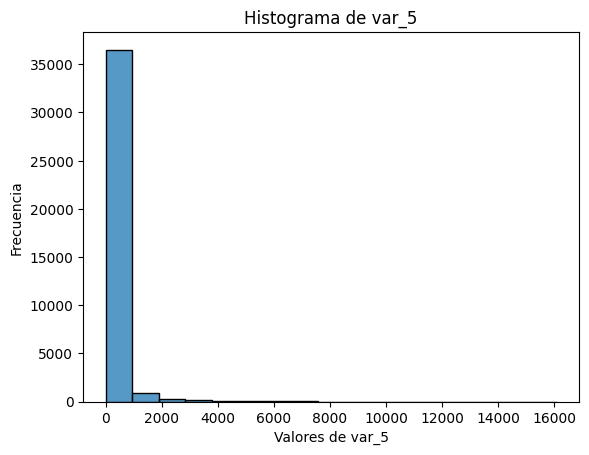

In [37]:
# Suponiendo que tu DataFrame se llama df
sns.histplot(src_train['var_5'], kde=False)

# Títulos y etiquetas
plt.title('Histograma de var_5')
plt.xlabel('Valores de var_5')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()


### 13. Realiza una tabla de frecuencias de cualquier variable del dataframe.  

In [39]:
def tabla_frecuencias(df, columna):
    tabla = df[columna].value_counts().reset_index()
    
    tabla.columns = ['Valor', 'Frecuencia'] # Cambiamos nombres a las columnas
    print (tabla)
    return tabla

tabla_frecuencias(src_train, 'var_5')


        Valor  Frecuencia
0        0.00       32188
1       30.00          80
2       60.00          44
3        4.50          35
4       15.00          23
...       ...         ...
4905  2320.65           1
4906  3444.42           1
4907   618.36           1
4908   127.44           1
4909  5722.77           1

[4910 rows x 2 columns]


### 14. Realiza una tabla de frecuencias relativas de la variable Target. 

In [51]:
def tabla_frecuencias_relativas(df, columna):
    # Calcular las frecuencias absolutas
    frecuencias = df[columna].value_counts()
   
    # Calcular las frecuencias relativas (frecuencia absoluta / total de elementos)
    frecuencias_relativas = frecuencias / len(df)
    
    tabla = pd.DataFrame({
        'Valor': frecuencias.index,
        'Frecuencia': frecuencias.values,
        'Frecuencia Relativa': frecuencias_relativas.values
    })

    print(tabla)


tabla_frecuencias_relativas(src_train, 'Target')

   Valor  Frecuencia  Frecuencia Relativa
0      0       36554             0.960254
1      1        1513             0.039746


### 15. Realiza un diagrama de cajas múltiple de la variable “var_2” por cada nivel de la variable “var_47”. 

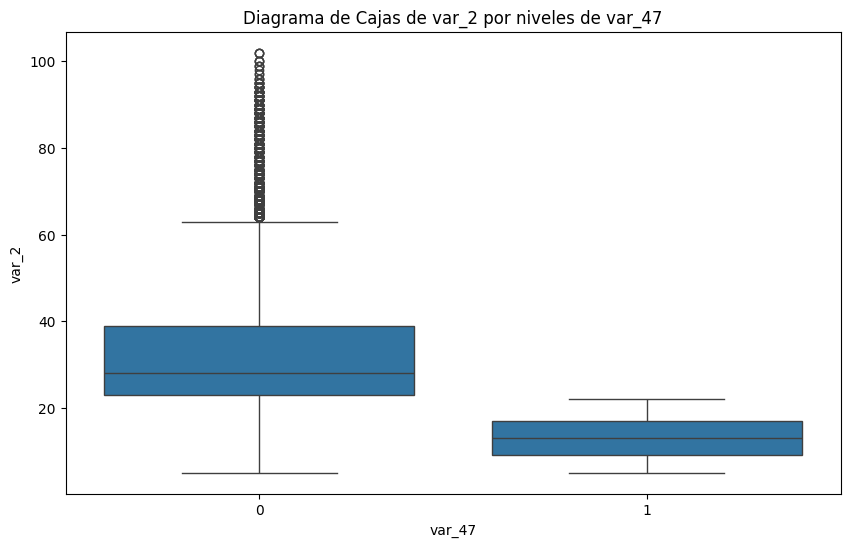

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='var_47', y='var_2', data=src_train)
plt.title('Diagrama de Cajas de var_2 por niveles de var_47')
plt.xlabel('var_47')
plt.ylabel('var_2')
plt.show()


### 16. Si existen outliers en el gráfico, imprímelos por pantalla.  

In [57]:

def detectar_outliers(df, columna):

    # Calcular el IQR (Rango Intercuartílico)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    # Imprimir los outliers
    if not outliers.empty:
        print("Outliers detectados:")
        #print(outliers)
    else:
        print("No se detectaron outliers.")
    
    return outliers

detectar_outliers(src_train, 'var_2')


Outliers detectados:


c:\Users\daekka\anaconda3\envs\NTTdata\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,ID,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_362,var_363,var_364,var_365,var_366,var_367,var_368,var_369,var_370,Target
13,77,2,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63324.900000,0.246968,1
40,172,2,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.024383,0
43,177,2,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.006051,0
50,193,2,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49965.870000,0.035056,0
55,207,2,76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53029.500000,0.047789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37988,151770,2,76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.031499,0
37998,151801,2,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55648.980000,0.165713,0
38027,74804,2,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139262.640000,0.103380,0
38039,90764,2,82,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79601.160000,0.054393,0


### 17. De la variable “var_370” examina los outliers. Puedes utilizar la fórmula clásica Q1 -1.5*RI y Q3 + 1.5 * RI. 

In [58]:
detectar_outliers(src_train, 'var_370')

Outliers detectados:


c:\Users\daekka\anaconda3\envs\NTTdata\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,ID,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_362,var_363,var_364,var_365,var_366,var_367,var_368,var_369,var_370,Target
1,14,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0.391089,0
8,60,2,40,0.0,1658.37,5722.77,247.56,835.86,0.0,960.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78390.810000,0.365323,0
87,340,2,24,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95251.920000,0.384279,1
103,417,4,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63203.340000,0.450084,0
110,436,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.393581,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37884,151381,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.434617,0
37920,151497,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168311.640000,0.368419,0
37928,151531,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60844.920000,0.448875,0
37967,151674,2,33,0.0,863.28,1063.95,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198675.690000,0.379731,0
